In [1]:
# Przygotuj wszystko tak jak na zajęciach 6 i zadania o fashion mnist. Jedyną różnicą będzie
# sieć:
#from tensorflow.keras.layers import Conv2D, MaxPooling2D

#model = Sequential()
#model.add(Conv2D(filters = 4, kernel_size = (3, 3), activation='relu', input_shape=(28, 28, 1)))
#model.add(MaxPooling2D((2, 2)))
#model.add(Flatten())
#model.add(Dense(10, activation='softmax'))

# następnie dodając kolejne warstwy konwolucyjne lub warstwy ukryte spróbuj poprawić wynik 
# działania sieci

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os
from tensorflow.keras.callbacks import EarlyStopping

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
EPOCHS = 20
es = EarlyStopping(monitor = "val_loss", mode = "min", patience = 5)


c:\Users\Lenovo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(filters = 4, kernel_size = (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters = 4, kernel_size = (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))


In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 4)         40        
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 4)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 4)         148       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 4)          0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [11]:
history = model.fit(x_train, y_train, epochs=EPOCHS, validation_split=0.2, callbacks=[es])

Epoch 1/20
1500/1500 [==============================] - 93s 62ms/step - loss: 2.7562 - accuracy: 0.5966 - val_loss: 0.8102 - val_accuracy: 0.7247
Epoch 2/20
1500/1500 [==============================] - 93s 62ms/step - loss: 0.7124 - accuracy: 0.7524 - val_loss: 0.6392 - val_accuracy: 0.7717
Epoch 3/20
1500/1500 [==============================] - 89s 59ms/step - loss: 0.5993 - accuracy: 0.7856 - val_loss: 0.5591 - val_accuracy: 0.7970
Epoch 4/20
1500/1500 [==============================] - 91s 61ms/step - loss: 0.5372 - accuracy: 0.8066 - val_loss: 0.5258 - val_accuracy: 0.8097
Epoch 5/20
1500/1500 [==============================] - 91s 61ms/step - loss: 0.5045 - accuracy: 0.8188 - val_loss: 0.5034 - val_accuracy: 0.8187
Epoch 6/20
1500/1500 [==============================] - 86s 57ms/step - loss: 0.4874 - accuracy: 0.8244 - val_loss: 0.4962 - val_accuracy: 0.8198
Epoch 7/20
1500/1500 [==============================] - 99s 66ms/step - loss: 0.4771 - accuracy: 0.8281 - val_loss: 0.4785 -

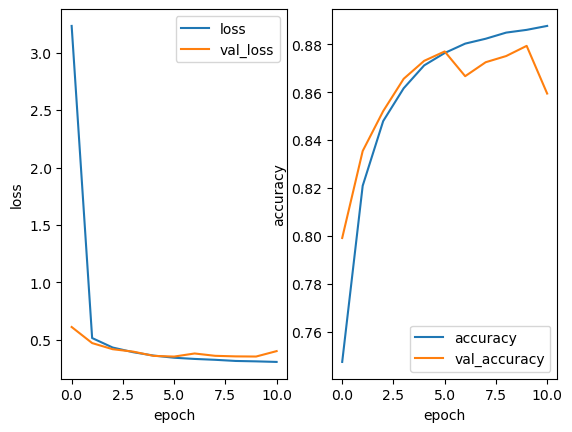

<Figure size 640x480 with 0 Axes>

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.subplot(1,2,1)
plt.plot(loss, label = "loss")
plt.plot(val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.subplot(1,2,2)
plt.plot(acc, label = "accuracy")
plt.plot(val_acc, label = "val_accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.show()
plt.tight_layout()

In [ ]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


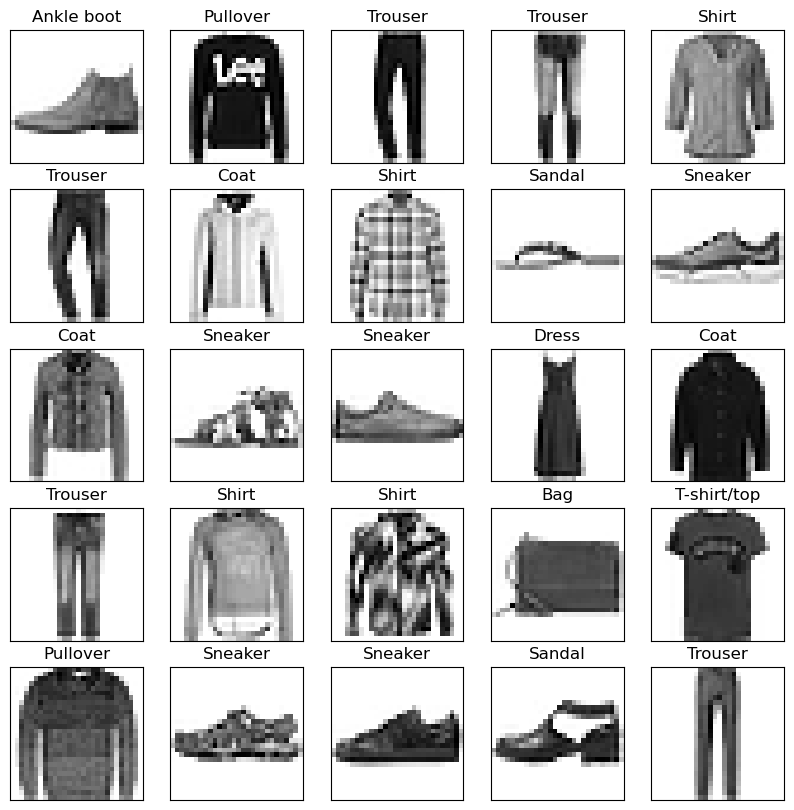

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(class_names[np.argmax(y_pred[i])])
    plt.imshow(x_test[i], cmap=plt.cm.binary)
plt.show()
